In [2]:
import os
import gzip
import shutil


#input_dir = "C:/Users/Violet/Desktop/cta_data/data/data"  
input_dir="./cta_data/data"
output_dir = "./unzipped_data" 

# 创建输出目录（如果不存在）
os.makedirs(output_dir, exist_ok=True)


for filename in os.listdir(input_dir):
    if filename.endswith(".csv.gz"):
        # 输入文件路径
        input_path = os.path.join(input_dir, filename)
        # 输出文件路径（去掉 .gz 后缀）
        output_path = os.path.join(output_dir, filename[:-3])  # 去掉 .gz

        # 解压
        with gzip.open(input_path, 'rb') as f_in:
            with open(output_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

        print(f"已解压: {filename} -> {output_path}")

已解压: 20170103.csv.gz -> ./unzipped_data\20170103.csv
已解压: 20170104.csv.gz -> ./unzipped_data\20170104.csv
已解压: 20170105.csv.gz -> ./unzipped_data\20170105.csv
已解压: 20170106.csv.gz -> ./unzipped_data\20170106.csv
已解压: 20170109.csv.gz -> ./unzipped_data\20170109.csv
已解压: 20170110.csv.gz -> ./unzipped_data\20170110.csv
已解压: 20170111.csv.gz -> ./unzipped_data\20170111.csv
已解压: 20170112.csv.gz -> ./unzipped_data\20170112.csv
已解压: 20170113.csv.gz -> ./unzipped_data\20170113.csv
已解压: 20170116.csv.gz -> ./unzipped_data\20170116.csv
已解压: 20170117.csv.gz -> ./unzipped_data\20170117.csv
已解压: 20170118.csv.gz -> ./unzipped_data\20170118.csv
已解压: 20170119.csv.gz -> ./unzipped_data\20170119.csv
已解压: 20170120.csv.gz -> ./unzipped_data\20170120.csv
已解压: 20170123.csv.gz -> ./unzipped_data\20170123.csv
已解压: 20170124.csv.gz -> ./unzipped_data\20170124.csv
已解压: 20170125.csv.gz -> ./unzipped_data\20170125.csv
已解压: 20170126.csv.gz -> ./unzipped_data\20170126.csv
已解压: 20170203.csv.gz -> ./unzipped_data\201702

In [3]:
import os
import pandas as pd

# 源文件夹路径
src_dir = r"D:/Study/Code/Modeling/2025华东杯/unzipped_data"
# 目标文件夹路径
out_dir = r"D:/Study/Code/Modeling/2025华东杯/dataxlsx"

# 如果目标文件夹不存在，创建之
os.makedirs(out_dir, exist_ok=True)

# 遍历源文件夹中所有文件
for filename in os.listdir(src_dir):
    if filename.lower().endswith('.csv'):
        csv_path = os.path.join(src_dir, filename)
        # 构造输出的 xlsx 文件名
        base_name = os.path.splitext(filename)[0]
        xlsx_filename = f"{base_name}.xlsx"
        xlsx_path = os.path.join(out_dir, xlsx_filename)

        try:
            # 读取 CSV
            df = pd.read_csv(csv_path)
            # 写入 Excel
            df.to_excel(xlsx_path, index=False)
            print(f"转换成功: {csv_path} -> {xlsx_path}")
        except Exception as e:
            print(f"转换失败: {csv_path}，错误: {e}")


转换成功: D:/Study/Code/Modeling/2025华东杯/unzipped_data\20170103.csv -> D:/Study/Code/Modeling/2025华东杯/dataxlsx\20170103.xlsx
转换成功: D:/Study/Code/Modeling/2025华东杯/unzipped_data\20170104.csv -> D:/Study/Code/Modeling/2025华东杯/dataxlsx\20170104.xlsx
转换成功: D:/Study/Code/Modeling/2025华东杯/unzipped_data\20170105.csv -> D:/Study/Code/Modeling/2025华东杯/dataxlsx\20170105.xlsx
转换成功: D:/Study/Code/Modeling/2025华东杯/unzipped_data\20170106.csv -> D:/Study/Code/Modeling/2025华东杯/dataxlsx\20170106.xlsx
转换成功: D:/Study/Code/Modeling/2025华东杯/unzipped_data\20170109.csv -> D:/Study/Code/Modeling/2025华东杯/dataxlsx\20170109.xlsx
转换成功: D:/Study/Code/Modeling/2025华东杯/unzipped_data\20170110.csv -> D:/Study/Code/Modeling/2025华东杯/dataxlsx\20170110.xlsx
转换成功: D:/Study/Code/Modeling/2025华东杯/unzipped_data\20170111.csv -> D:/Study/Code/Modeling/2025华东杯/dataxlsx\20170111.xlsx
转换成功: D:/Study/Code/Modeling/2025华东杯/unzipped_data\20170112.csv -> D:/Study/Code/Modeling/2025华东杯/dataxlsx\20170112.xlsx
转换成功: D:/Study/Code/Modeling/202

# 例子

>大概是数据预处理加特征提取


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# 读取数据
def load_data(file_path):
    # 假设文件格式为：文件名是时间戳，内容为多列（open, high, low, close, volume, openinterest）
    df = pd.read_csv(file_path, delimiter="|", header=0)
    
    # 修正时间戳格式（假设文件名是时间戳）
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df = df.sort_values(by='datetime').reset_index(drop=True)
    
    # 处理缺失值（填充或删除）
    df.fillna(method='ffill', inplace=True)  # 前向填充
    df.dropna(inplace=True)  # 删除仍存在的缺失值
    
    # 处理重复值（保留最新的一行）
    df.drop_duplicates(subset=['datetime'], keep='last', inplace=True)
    
    return df

# 数据标准化/归一化
def normalize_data(df):
    # 价格、成交量、持仓量归一化（Min-Max）
    scaler_price = MinMaxScaler()
    price_cols = ['open', 'high', 'low', 'close']
    df[price_cols] = scaler_price.fit_transform(df[price_cols])
    
    # 成交量、持仓量标准化（Z-score）
    scaler_vol = StandardScaler()
    vol_cols = ['volume', 'openinterest']
    df[vol_cols] = scaler_vol.fit_transform(df[vol_cols])
    
    return df, scaler_price, scaler_vol

# 提取时间特征（正弦/余弦编码）
def extract_time_features(df):
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute
    
    # 正弦/余弦编码
    df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['sin_minute'] = np.sin(2 * np.pi * df['minute'] / 60)
    df['cos_minute'] = np.cos(2 * np.pi * df['minute'] / 60)
    
    return df

# 提取技术指标（MA, RSI, 布林带等）
def extract_technical_indicators(df):
    # 移动平均线（MA5, MA20）
    df['MA5'] = df['close'].rolling(window=5).mean()
    df['MA20'] = df['close'].rolling(window=20).mean()
    
    # 相对强弱指数（RSI）
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # 布林带
    rolling_mean = df['close'].rolling(window=20).mean()
    rolling_std = df['close'].rolling(window=20).std()
    df['Bollinger_High'] = rolling_mean + 2 * rolling_std
    df['Bollinger_Low'] = rolling_mean - 2 * rolling_std
    
    # 价格变化
    df['price_change_1m'] = df['close'].pct_change()
    df['price_change_5m'] = df['close'].pct_change(periods=5)
    
    return df

# 构建监督学习数据集（滑动窗口）
def create_dataset(df, look_back=60, target_window=30):
    X, Y = [], []
    for i in range(len(df) - look_back - target_window):
        X.append(df.iloc[i:i+look_back].values)  # 过去 look_back 分钟的数据
        Y.append((df['close'].iloc[i+look_back+target_window] - df['close'].iloc[i+look_back]) / df['close'].iloc[i+look_back])  # 未来 target_window 分钟的涨跌幅
    return np.array(X), np.array(Y)

# 主函数
def main():
    # 路径替换为实际文件路径
    file_path = "data.csv"
    df = load_data(file_path)
    
    # 数据标准化
    df, scaler_price, scaler_vol = normalize_data(df)
    
    # 提取时间特征
    df = extract_time_features(df)
    
    # 提取技术指标
    df = extract_technical_indicators(df)
    
    # 构建监督学习数据集
    look_back = 60  # 使用过去 60 分钟的数据
    target_window = 30  # 预测未来 30 分钟的涨跌幅
    X, y = create_dataset(df, look_back, target_window)
    
    # 划分训练集、验证集、测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False)  # 60%训练，15%验证，25%测试
    
    # 返回处理后的数据
    return X_train, X_val, X_test, y_train, y_val, y_test

# 执行主函数
if __name__ == "__main__":
    X_train, X_val, X_test, y_train, y_val, y_test = main()

# 多文件合并
> aushdiuw

```
whdkiahwd
```

In [7]:
import os
import pandas as pd
import numpy as np
from glob import glob
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [1]:

# 获取所有CSV文件路径
def get_file_paths(folder_path):
    return sorted(glob(os.path.join(folder_path, "*.csv")))  

# 读取并合并所有CSV文件
def load_and_merge_data(folder_path):
    file_paths = get_file_paths(folder_path)
    dfs = []
    for file in file_paths:
        df = pd.read_csv(file)
        # 日期
        date_str = os.path.basename(file).replace(".csv", "")
        df['datetime'] = pd.to_datetime(date_str + " " + df['datetime'])
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# 读取
folder_path = "./unzipped_data"  
df = load_and_merge_data(folder_path)

In [3]:
# 保存合并后的 CSV 文件
output_file_path = "./merged_data2.csv"  # 替换为您希望保存的路径
df.to_csv(output_file_path, index=False)

ValueError: offset must be a timedelta strictly between -timedelta(hours=24) and timedelta(hours=24).

In [5]:
# 数据清洗
def clean_data(df):
    # 处理缺失值
    df.fillna(method='ffill', inplace=True)  # 前向填充
    df.dropna(inplace=True)  # 删除仍存在的缺失值
    
    # 处理重复值（保留最新的一行）
    df.drop_duplicates(subset=['datetime'], keep='last', inplace=True)
    
    # 确保时间戳连续（补充缺失的时间点）
    df.set_index('datetime', inplace=True)
    df = df.asfreq('T')  # 设置为1分钟频率
    df.reset_index(inplace=True)
    
    return df

# 标准化处理
def normalize_data(df):
    # 价格归一化（Min-Max）
    scaler_price = MinMaxScaler()
    price_cols = ['open', 'high', 'low', 'close']
    df[price_cols] = scaler_price.fit_transform(df[price_cols])
    
    # 成交量/持仓量标准化（Z-score）
    scaler_vol = StandardScaler()
    vol_cols = ['volume', 'openinterest']
    df[vol_cols] = scaler_vol.fit_transform(df[vol_cols])
    
    return df, scaler_price, scaler_vol

# 执行清洗与标准化
df = clean_data(df)
df, scaler_price, scaler_vol = normalize_data(df)

In [ ]:
# 保存合并后的 CSV 文件
output_file_path = "./merged_data2.csv"  # 替换为您希望保存的路径
df.to_csv(output_file_path, index=False)

In [5]:
import os
import pandas as pd
import numpy as np
from glob import glob
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 获取所有CSV文件路径
def get_file_paths(folder_path):
    return sorted(glob(os.path.join(folder_path, "*.csv")))  # 按日期排序

# 读取并合并所有CSV文件
def load_and_merge_data(folder_path):
    file_paths = get_file_paths(folder_path)
    dfs = []
    for file in file_paths:
        df = pd.read_csv(file)
        # 提取文件名中的日期作为时间戳
        date_str = os.path.basename(file).replace(".csv", "")
        df['datetime'] = pd.to_datetime(date_str + " " + df['datetime'])
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# 示例：读取文件夹数据
folder_path = "./unzipped_data/"  # 替换为实际路径
df = load_and_merge_data(folder_path)

In [ ]:
import os
import pandas as pd
from glob import glob

# 获取所有CSV文件路径
def get_file_paths(folder_path):
    return sorted(glob(os.path.join(folder_path, "*.csv")))  # 按日期排序

# 读取并合并所有CSV文件
def load_and_merge_data(folder_path):
    file_paths = get_file_paths(folder_path)
    dfs = []
    for file in file_paths:
        df = pd.read_csv(file)
        # 提取文件名中的日期作为时间戳
        date_str = os.path.basename(file).replace(".csv", "")
        df['datetime'] = pd.to_datetime(date_str + " " + df['datetime'])
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# 主函数
def main():
    folder_path = "path/to/your/folder"  # 替换为实际路径
    df = load_and_merge_data(folder_path)
    
    # 保存合并后的 CSV 文件
    output_file_path = "merged_data.csv"  # 替换为您希望保存的路径
    df.to_csv(output_file_path, index=False)
    print(f"合并后的文件已保存到: {output_file_path}")

if __name__ == "__main__":
    main()

In [2]:
df = pd.read_csv("./normalized_vol.csv")

In [3]:
import pandas as pd

# 假设 df 是标准化后的数据集
mean_volume = df['volume'].mean()
std_volume = df['volume'].std()
print(f"均值: {mean_volume}, 标准差: {std_volume}")

均值: 5.562708034670524e-17, 标准差: 1.000000590944244


In [5]:
import numpy as np

# 验证均值是否接近 0
print(np.isclose(mean_volume, 0))  # 输出: True
# 验证标准差是否接近 1
print(np.isclose(std_volume, 1))    # 输出: True

True
True


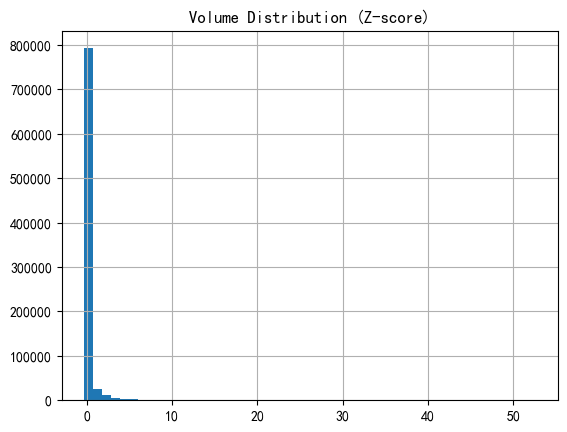

In [4]:
import matplotlib.pyplot as plt

df['volume'].hist(bins=50)
plt.title("Volume Distribution (Z-score)")
plt.show()

In [8]:
import pandas as pd
import scipy.stats as stats

# 计算偏度和峰度
#skewness = stats.skew(df['volume_standardized'])
skewness = stats.skew(df['volume'])
#urtosis = stats.kurtosis(df['volume_standardized'])
kurtosis = stats.kurtosis(df['volume'])
print(f"偏度: {skewness}, 峰度: {kurtosis}")

偏度: 10.518653188533246, 峰度: 202.80588538675755


In [10]:
import seaborn as sns


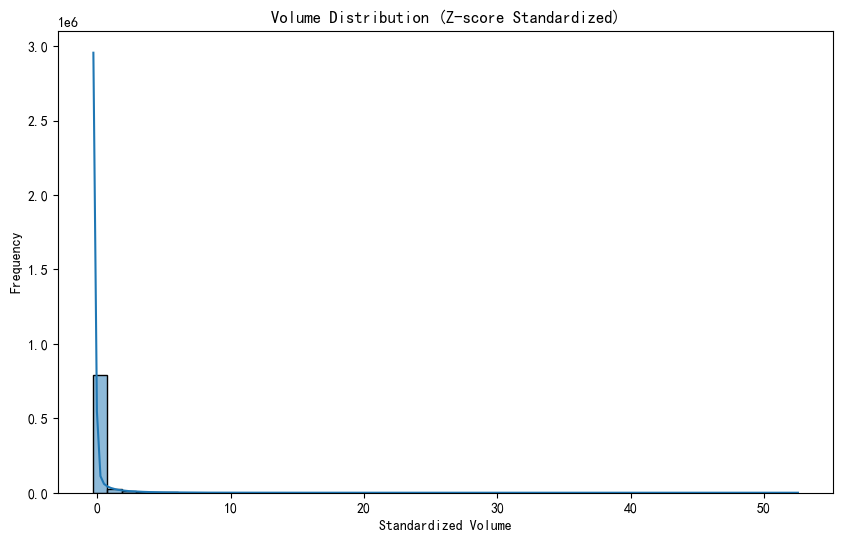

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['volume'], kde=True, bins=50)
plt.title("Volume Distribution (Z-score Standardized)")
plt.xlabel("Standardized Volume")
plt.ylabel("Frequency")
plt.show()

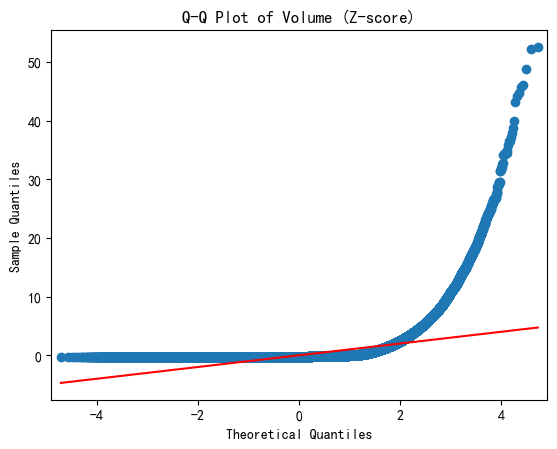

In [13]:
import statsmodels.api as sm

sm.qqplot(df['volume'], line='s')
plt.title("Q-Q Plot of Volume (Z-score)")
plt.show()